In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [58]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
with open('data/district.json', 'r') as file:
    data = json.loads(file.read())

In [7]:
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['benchmarks', 'schools', 'courseSections', 'courseSectionRosters', 'scores'])


In [47]:
benchmarks_df = pd.DataFrame(data['benchmarks'])
schools_df = pd.DataFrame(data['schools'])
courseSections_df = pd.DataFrame(data['courseSections'])
courseSectionRosters_df = pd.DataFrame(data['courseSectionRosters'])
scores_df = pd.DataFrame(data['scores'])

# data exploration

## benchmarks

In [9]:
print("benchmarks_df")
print(benchmarks_df.shape)
print(benchmarks_df.columns)

benchmarks_df
(42, 6)
Index(['id', 'districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [10]:
benchmarks_df['year'] = pd.to_numeric(benchmarks_df['year'], errors='coerce').astype('int64')
benchmarks_df['level'] = pd.to_numeric(benchmarks_df['level'], errors='coerce').astype('int64')
benchmarks_df['value'] = pd.to_numeric(benchmarks_df['value'], errors='coerce').astype('float64')

print(benchmarks_df.dtypes)

id             object
districtId     object
year            int64
level           int64
dataSource     object
value         float64
dtype: object


In [11]:
benchmarks_df

,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356.0
1,121,45,2017,3,value_scantronReading,2563.0
2,122,45,2017,4,value_scantronMath,2493.0
3,123,45,2017,4,value_scantronReading,2674.0
4,124,45,2017,5,value_scantronMath,2584.0
5,125,45,2017,5,value_scantronReading,2841.0
6,126,45,2017,6,value_scantronMath,2675.0
7,127,45,2017,6,value_scantronReading,2897.0
8,128,45,2017,7,value_scantronMath,2766.0
9,129,45,2017,7,value_scantronReading,3008.0


In [12]:
# removing data that doesn't exist for both 2017 and 2018 (can't compare)
scores_df_2017 = benchmarks_df[benchmarks_df['year'] == 2017]
level_source_combinations = scores_df_2017[['level', 'dataSource']].drop_duplicates()
scores_df_2018 = benchmarks_df.merge(level_source_combinations, on=['level', 'dataSource'])
scores_df_2018 = scores_df_2018[scores_df_2018['year'] == 2018]
scores_df_pairs = pd.concat([scores_df_2017, scores_df_2018])
scores_df_pairs = scores_df_pairs.sort_values(['level', 'dataSource', 'year'])

# filtering out ACT composite bc it's on a different scale
scores_df_pairs = scores_df_pairs[scores_df_pairs['dataSource'] != 'value_actCompositeScore']
scores_df_pairs

,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356.0
13,133,45,2018,3,value_scantronMath,2364.0
1,121,45,2017,3,value_scantronReading,2563.0
14,134,45,2018,3,value_scantronReading,2518.0
2,122,45,2017,4,value_scantronMath,2493.0
15,135,45,2018,4,value_scantronMath,2488.0
3,123,45,2017,4,value_scantronReading,2674.0
16,136,45,2018,4,value_scantronReading,2678.0
4,124,45,2017,5,value_scantronMath,2584.0
17,137,45,2018,5,value_scantronMath,2589.0


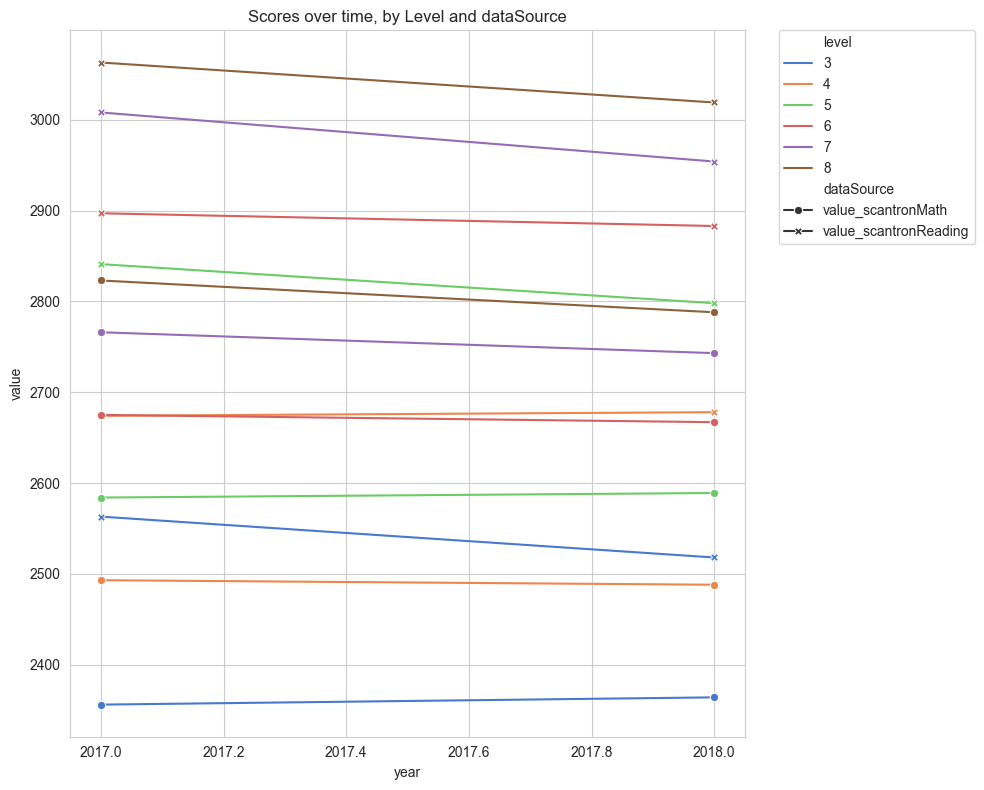

In [13]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='year', y='value', hue='level', style='dataSource', data=scores_df_pairs, markers=True, dashes=False, palette = 'muted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Scores over time, by Level and dataSource")
plt.tight_layout()
plt.show()

## schools

In [14]:
print("schools_df")
print(schools_df.shape)
print(schools_df.columns)

schools_df
(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


In [15]:
schools_df

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,,0
1,223,Middle School A,45,8,EMS,1,,0
2,224,High School A,45,10,ECHS,1,,0
3,225,Junior High B,45,12,ECJH,1,,0
4,226,Elementary School B,45,18,HES,1,,0
5,227,Middle School C,45,19,HMS,1,,0
6,228,High School B,45,20,HHS,1,,0
7,229,Middle School D,45,23,MJH,1,,0
8,230,Elementary School C,45,30,RSE,1,,0
9,231,Elementary School D,45,35,CES,1,,0


## courseSections

In [16]:
print("courseSections_df")
print(courseSections_df.shape)
print(courseSections_df.columns)

courseSections_df
(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


In [17]:
courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


## courseSectionRosters

In [48]:
print("courseSectionRosters_df")
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.columns)

courseSectionRosters_df
(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [49]:
courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,


In [50]:
courseSectionRosters_df = pd.merge(courseSectionRosters_df, courseSections_df, left_on='courseSectionId', right_on='id', how='left', suffixes=('', ''))
courseSectionRosters_df = courseSectionRosters_df.drop(columns=['id_y'])
courseSectionRosters_df.head()

,id_x,courseSectionId,studentId,studentLevel,ticket,vanityId,year,schoolId
0,1047696,39975,45333,4,,MathGrade 4,2015,232
1,1047704,39975,56116,4,,MathGrade 4,2015,232
2,1047706,39975,45345,4,,MathGrade 4,2015,232
3,1047715,39975,45400,4,,MathGrade 4,2015,232
4,1047729,39975,45413,4,,MathGrade 4,2015,232


In [62]:
courseSectionRosters_df['year'].value_counts()

year
2015    228471
2017    129612
2018    129147
2016    125011
Name: count, dtype: int64

In [63]:
courseSectionRosters_df['studentLevel'].value_counts()

studentLevel
10    54246
9     52595
7     51315
1     49253
4     49171
8     48846
2     48820
12    47993
3     47529
11    47342
5     41209
6     40529
0     28458
99     2930
98     1290
97      670
96       45
Name: count, dtype: int64

In [57]:
list(courseSectionRosters_df['vanityId'].unique())

['MathGrade 4',
 'MathGrade 3',
 'SOC ST 4',
 'SCIENCE 4',
 'PE 4',
 'READING 4',
 'LANGUAGE 4',
 'SCIENCE 3',
 'SOC ST 3',
 'PE 3',
 'READING 3',
 'LANGUAGE 3',
 'AAS:Read-4',
 'AAS:Math-4',
 'AAS:Math-3',
 'AAS:Read-3',
 'PE 2',
 'SOC ST 2',
 'HOMEROOM',
 'SCIENCE 2',
 'LANGUAGE 2',
 'MATH 2',
 'READING 2',
 'PE 1',
 'READING 1',
 'SCIENCE 1',
 'LANGUAGE 1',
 'MATH 1',
 'SOC SCI 1',
 'READING K',
 'PE K',
 'HmroomPK6',
 'MATH 4',
 'MATH 3',
 'SOC ST 1',
 'Algebra IH',
 'MathGrade 5',
 'STUDY HALL',
 'Eng 8 H/Adv',
 'Advisory 8',
 'CONTISS 7-8',
 'WLDHIS H/Adv',
 'CareerPrep-A',
 'PhySci8H/Adv',
 'PE 8',
 'PhySci Gr 8',
 'MATH8 PREALG',
 'English Gr 8',
 'WLDHIS 1500',
 'ContIssu 7-8',
 'StuAide7-8NC',
 'English LA 5',
 'PE 5',
 'Science Gr 5',
 'SocialStuGr5',
 'Math6H/Adv',
 'SciGr6H/A',
 'ELAGrPK6H/Ad',
 'SoSt6H/A',
 'PE 6',
 'MATHINVET7-8',
 'MATH 7',
 'LANG ARTS 7',
 'PE 7',
 'SCIENCE LI 7',
 'Geog Gr7',
 'CivicsGr 7',
 'Advisory 7',
 'EnricMath78',
 'LifeSciH Gr7',
 'GeogH/AdvGr

In [59]:
# Group by vanityId (course name) and courseSectionId, then count students
course_sizes = courseSectionRosters_df.groupby(['vanityId', 'courseSectionId'])['studentId'].count().reset_index()

# Calculate average size for each course
average_course_sizes = course_sizes.groupby('vanityId')['studentId'].mean().sort_values(ascending=False)

# Display the results
print("Average course sizes:")
print(average_course_sizes)

Average course sizes:
vanityId
District Wide - IS     26829.750000
District Wide - ISS    26829.750000
District Wide - GA     11543.333333
Schoolwide -237sID      1490.750000
Schoolwide -229sID      1231.000000
Schoolwide -236sID      1182.000000
Schoolwide -233sID      1140.000000
Schoolwide -235sID       992.250000
Schoolwide -231sID       970.250000
Schoolwide -234sID       925.500000
Schoolwide -226sID       704.000000
Schoolwide -227sID       678.000000
Schoolwide -232sID       654.875000
Schoolwide -222sID       559.250000
Schoolwide -228sID       484.333333
Schoolwide -224sID       483.000000
Music Grade2             321.000000
Tech Ed Gr 2             321.000000
Tech Ed Gr 1             296.000000
Music Grade1             296.000000
Music GradeK             291.000000
Tech Ed Gr K             291.000000
ACT ROI                  207.250000
PE 1                     125.071429
PE 2                     124.571429
PE K                     121.785714
RTI Math Tier II         107.0000

In [51]:
# print number of times each student appears
student_counts = scores_df['studentId'].value_counts()
print(student_counts)
print(student_counts.describe())

studentId
48102    6
53036    6
48763    6
51819    6
48747    6
        ..
54623    1
54622    1
54621    1
54620    1
54521    1
Name: count, Length: 12211, dtype: int64
count    12211.000000
mean         2.810335
std          1.724629
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: count, dtype: float64


## scores

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
print('scores_df')
print(scores_df.shape)
print(scores_df.columns)

scores_df
(34317, 71)
Index(['id', 'ticket', 'studentId', 'studentLevel', 'year',
       'measurementTypeId', 'subgroup_specialEd', 'subgroup_lunchStatus',
       'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell',
       'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore',
       'value_actReadingScore', 'value_actScienceScore',
       'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading',
       'value_nweaEnglish', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath',
       'value_scantronReading', 'value_mapMath', 'value_mapEnglish',
       'value_mapReading', 'value_mapRLA', 'value_scantronScience',
       'value_scantronLanguage', 'value_ReadingFoundations',
       'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore',
       'value_mapScience', 'value_LeapELAS

In [23]:
# convert dtype to numeric
int_columns = ['id', 'studentId', 'studentLevel', 'year', 'measurementTypeId'] + [col for col in scores_df.columns if col.startswith('subgroup_')]
for col in int_columns:
    scores_df[col] = pd.to_numeric(scores_df[col], errors='coerce').astype('int64')

value_columns = [col for col in scores_df.columns if col.startswith('value_')]
for col in value_columns:
    scores_df[col] = pd.to_numeric(scores_df[col], errors='coerce').astype('float64')

scores_df.dtypes

id                        int64
ticket                   object
studentId                 int64
studentLevel              int64
year                      int64
                         ...   
value_gcaInfo           float64
value_gcaNar            float64
value_gcaOpin           float64
value_aimsWebMath       float64
value_aimsWebReading    float64
Length: 71, dtype: object

In [24]:
print(f"specialEd {scores_df['subgroup_specialEd'].nunique()}")
print(f"lunchStatus {scores_df['subgroup_lunchStatus'].nunique()}")
print(f"gender {scores_df['subgroup_gender'].nunique()}")
print(f"ethnicity {scores_df['subgroup_ethnicity'].nunique()}")
print(f"ell {scores_df['subgroup_ell'].nunique()}")
print(f"bottom25 {scores_df['subgroup_bottom25'].nunique()}")


specialEd 2
lunchStatus 2
gender 1
ethnicity 1
ell 1
bottom25 2


In [53]:
scores_df['studentLevel'].value_counts()

studentLevel
7     4562
8     4370
6     4350
4     4338
5     4332
3     4283
11    2254
9     1041
10     987
1      906
2      874
0      848
12     767
99     240
98     103
97      53
96       9
Name: count, dtype: int64

In [25]:
# remove columns that only contain zeros
scores_df = scores_df.loc[:, (scores_df != 0).any()]
scores_df.shape

(34317, 17)

In [26]:
scores_df.describe()

,id,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_scantronMath,value_scantronReading,value_starMath
count,34317.00000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,34317.000000,33888.000000,34317.000000,34317.000000
mean,256120.51983,53660.648833,7.011248,2017.703121,5.179241,0.025294,0.265757,0.148906,1.103447,1.075036,1.165924,1.141359,1.128566,1887.931982,2025.834951,724.391235
std,109608.57171,12202.390021,10.359560,0.532688,0.905657,0.157018,0.441742,0.356001,4.393720,4.423713,4.759324,4.586571,4.528313,1117.861457,1218.226431,1132.420632
min,115316.00000,44774.000000,0.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123897.00000,48560.000000,4.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,240376.00000,50893.000000,6.000000,2018.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2441.000000,2611.000000,0.000000
75%,336324.00000,52970.000000,8.000000,2018.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2619.000000,2888.000000,2223.000000
max,504214.00000,97180.000000,99.000000,2020.000000,6.000000,1.000000,1.000000,1.000000,34.000000,36.000000,36.000000,36.000000,35.000000,3498.000000,3700.000000,3247.000000
